In [21]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/Users/michae14/Downloads/nba_draft_combine_all_years.csv')

df.head()

,id,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248,8.2,NaN,NaN,22.0,10.95,3.28
1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213,5.1,NaN,NaN,9.0,11.15,3.18
2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215,4.4,NaN,NaN,8.0,11.17,3.14
3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234,8.5,NaN,NaN,18.0,11.12,3.27
4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228,5.2,NaN,NaN,5.0,11.17,3.35


In [22]:
# Drop rows with NaN values in the Draft pick column 
df = df.dropna(subset= 'Draft pick')

In [23]:
# Convert float values to integers
df['Draft pick'] = df['Draft pick'].astype(int)

df.head()

,id,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248,8.2,NaN,NaN,22.0,10.95,3.28
1,1,Terrence Williams,2009,11,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213,5.1,NaN,NaN,9.0,11.15,3.18
2,2,Gerald Henderson,2009,12,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215,4.4,NaN,NaN,8.0,11.17,3.14
3,3,Tyler Hansbrough,2009,13,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234,8.5,NaN,NaN,18.0,11.12,3.27
4,4,Earl Clark,2009,14,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228,5.2,NaN,NaN,5.0,11.17,3.35


In [24]:
# Count the row in the dataset
print("Number of rows:", df.shape[0])

Number of rows: 384


In [25]:
# Count the number of NaN values in each column
na_count = df.isna().sum()

# Print the count of NaN values for each column
print(na_count)

id                            0
Player                        0
Year                          0
Draft pick                    0
Height (No Shoes)             0
Height (With Shoes)           0
Wingspan                      0
Standing reach                0
Vertical (Max)               52
Vertical (Max Reach)         52
Vertical (No Step)           52
Vertical (No Step Reach)     52
Weight                        0
Body Fat                      1
Hand (Length)                41
Hand (Width)                 43
Bench                       162
Agility                      57
Sprint                       54
dtype: int64


In [26]:
# Get the list of columns with NaN values
columns_with_na = df.columns[df.isna().any()].tolist()
print("Columns with NaN values:", columns_with_na)

Columns with NaN values: ['Vertical (Max)', 'Vertical (Max Reach)', 'Vertical (No Step)', 'Vertical (No Step Reach)', 'Body Fat', 'Hand (Length)', 'Hand (Width)', 'Bench', 'Agility', 'Sprint']


### 
### First Step: Calculate the Missing Value

In [27]:
# Split the dataset into two parts: one with missing values and one without
df_missing = df[df.isnull().any(axis=1)]  # Rows with missing values
df_complete = df.dropna()  # Rows without missing values

In here, I will delete some column that are not useful to predict measurement data

In [28]:
# Define the list of unuseful column names
unuseful_columns = ['id', 'Player', 'Year', 'Draft pick']

# Drop unuseful columns from the DataFrame
df_complete = df_complete.drop(columns=unuseful_columns)
df_missing = df_missing.drop(columns=unuseful_columns)

In [29]:
# Define features and target variable
X = df_complete.dropna(axis=1)  # Assuming no missing values in the target variable
y = df_complete[columns_with_na]

In here, I would like to use a random forest to help me predict the missing value

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [31]:
# Predict missing values
predicted_values = model.predict(df_missing)

# Fill missing values in the dataset with the predicted values
df.loc[df.isnull().any(axis=1), columns_with_na] = predicted_values

Now, df contains the original dataset with missing values filled using predictions from the Random Forest model

In [32]:
df

,id,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1,80.50,82.00,83.25,105.0,35.890,141.705,31.295,137.110,248,6.774,8.9325,9.7700,16.94,11.2867,3.2340
1,1,Terrence Williams,2009,11,77.00,78.25,81.00,103.5,36.980,140.635,30.470,134.125,213,6.091,8.7575,9.4500,8.18,11.0325,3.2629
2,2,Gerald Henderson,2009,12,76.00,77.00,82.25,102.5,35.715,138.710,30.560,133.555,215,6.219,8.6350,9.3375,7.45,11.2453,3.2843
3,3,Tyler Hansbrough,2009,13,80.25,81.50,83.50,106.0,33.710,140.305,28.650,135.245,234,6.652,9.0750,9.8175,16.77,11.4978,3.2997
4,4,Earl Clark,2009,14,80.50,82.25,86.50,109.5,33.435,142.120,29.070,137.755,228,7.912,9.0000,9.4850,5.74,11.5860,3.3903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,489,Monte Morris,2017,51,73.25,74.50,76.00,96.5,33.030,131.275,27.365,125.610,175,6.810,8.2700,9.1225,5.68,11.1566,3.3133
490,490,Edmond Sumner,2017,52,76.00,77.75,81.00,102.5,37.065,140.425,31.090,134.450,176,6.992,8.7775,9.2575,11.92,11.1225,3.2543
491,491,Kadeem Allen,2017,53,73.00,74.25,81.25,99.5,36.605,137.350,31.200,131.945,192,6.364,8.4775,9.0825,9.97,11.1056,3.2550
492,492,Alec Peters,2017,54,79.25,80.75,82.75,105.0,36.285,141.270,30.615,135.600,232,7.108,8.9250,9.6475,12.08,11.1889,3.2889


In [33]:
# Count the number of NaN values in each column
na_count = df.isna().sum()

# Print the count of NaN values for each column
print(na_count)

id                          0
Player                      0
Year                        0
Draft pick                  0
Height (No Shoes)           0
Height (With Shoes)         0
Wingspan                    0
Standing reach              0
Vertical (Max)              0
Vertical (Max Reach)        0
Vertical (No Step)          0
Vertical (No Step Reach)    0
Weight                      0
Body Fat                    0
Hand (Length)               0
Hand (Width)                0
Bench                       0
Agility                     0
Sprint                      0
dtype: int64


### Second Step: Develop Model for Predicting the Draft Pick

### 1. Decision Tree
Decision trees are intuitive and easy to interpret. I want to start with decision trees to understand the feature importance.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the list of unuseful column names
unuseful_columns = ['id', 'Player', 'Year']

# Drop unuseful columns from the DataFrame
df_predict = df.drop(columns=unuseful_columns)

# Separate features (X) and target variable (y)
X = df_predict.drop(columns=['Draft pick'])  # Features
y = df['Draft pick']  # Target variable

In [37]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [38]:
# Initialize DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

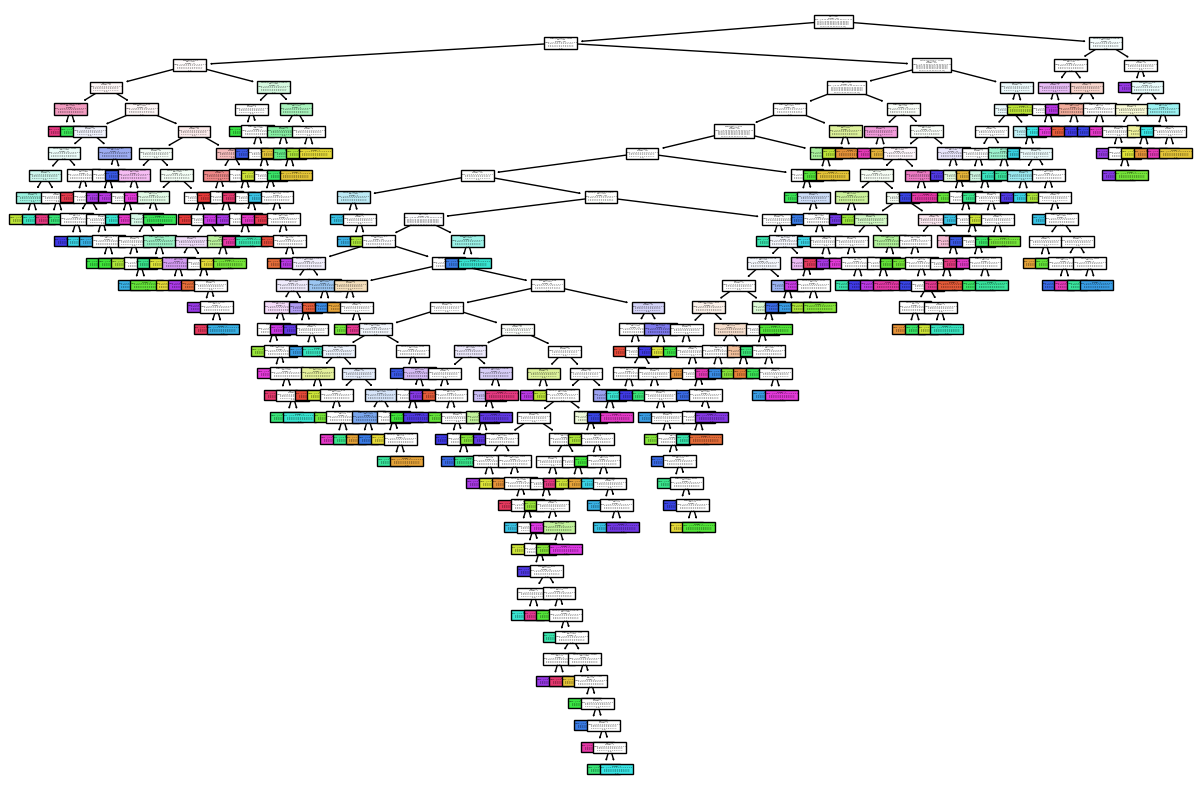

In [40]:
# Visualize Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=X.columns, filled=True)
plt.show()

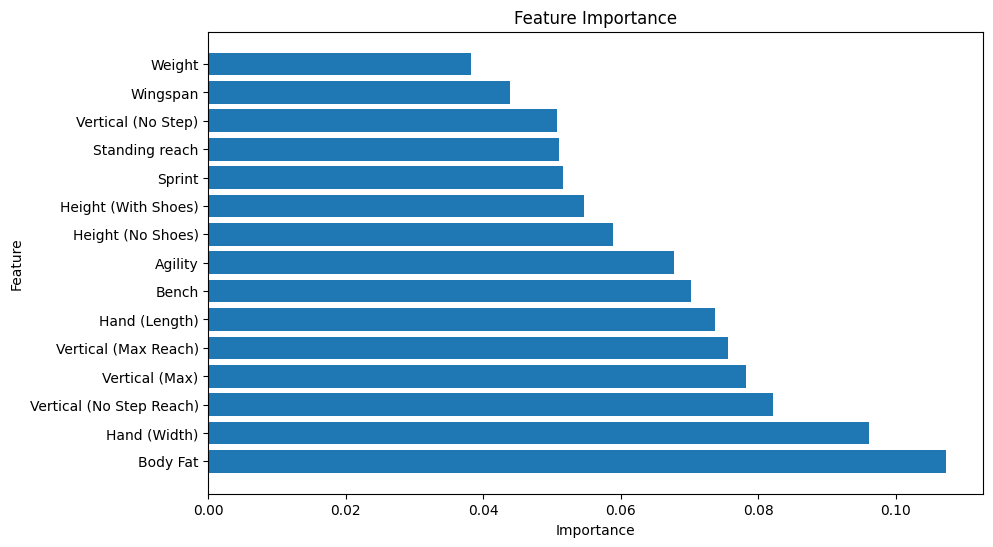

In [41]:
# Extract feature importance
feature_importance = dt_classifier.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [46]:
# Predict on test data
y_pred = dt_classifier.predict(X_test)

predict = pd.DataFrame({'Actual_Draft': y_test, 'Predicted_Draft': y_pred})
predict

,Actual_Draft,Predicted_Draft
311,59,51
55,14,56
223,23,14
1,11,22
104,16,44
...,...,...
184,40,37
68,30,18
138,60,51
31,41,18


In [47]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.012987012987012988


An accuracy score of 0.012987012987012988 means that the model's predictions are accurate for approximately 1.3% of the test data samples, which is a poor preformance mainly caused by insufficient data, model limitations, complexity of problem, etc. 

In [55]:
def accuracy_within_range(y_true, y_pred, tolerance):

    correct_count = 0
    total_count = len(y_true)

    for true_val, pred_val in zip(y_true, y_pred):
        if abs(true_val - pred_val) <= tolerance:
            correct_count += 1

    accuracy = correct_count / total_count

    return accuracy

# Assuming y_test contains the actual values and y_pred contains the predicted values
tolerance = 3
accuracy_within_tolerance = accuracy_within_range(y_test, y_pred, tolerance)
print("Accuracy within ±3 range:", accuracy_within_tolerance)

Accuracy within ±3 range: 0.07792207792207792


### 2. Random Forest
Random forests are powerful ensemble learning methods that can handle both regression and classification tasks. They are robust and less prone to overfitting, which could be advantageous for predicting draft picks.

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=14)  # You can adjust the number of trees (n_estimators) as needed

In [51]:
# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on Test Data
y_pred_rf = rf_classifier.predict(X_test)

predict2 = pd.DataFrame({'Actual_Draft': y_test, 'Predicted_Draft': y_pred_rf})
predict2

,Actual_Draft,Predicted_Draft
311,59,51
55,14,33
223,23,18
1,11,12
104,16,50
...,...,...
184,40,37
68,30,35
138,60,34
31,41,13


In [53]:
# Evaluate Model Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.05194805194805195


In [54]:
def accuracy_within_range(y_true, y_pred, tolerance):

    correct_count = 0
    total_count = len(y_true)

    for true_val, pred_val in zip(y_true, y_pred):
        if abs(true_val - pred_val) <= tolerance:
            correct_count += 1

    accuracy = correct_count / total_count

    return accuracy

# Assuming y_test contains the actual values and y_pred contains the predicted values
tolerance = 3
accuracy_within_tolerance = accuracy_within_range(y_test, y_pred_rf, tolerance)
print("Accuracy within ±3 range:", accuracy_within_tolerance)

Accuracy within ±3 range: 0.2077922077922078
